In [33]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("/Users/nguyenthuyvy/Desktop/Basic Knowledge/PYTHON/Python Projects_Oreilly/10 Python Projects/Python_Real_Projects/9. App 4- Data analysis and visualization with pandas and Matplotlib/reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Rating average/count by day

In [37]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()
day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


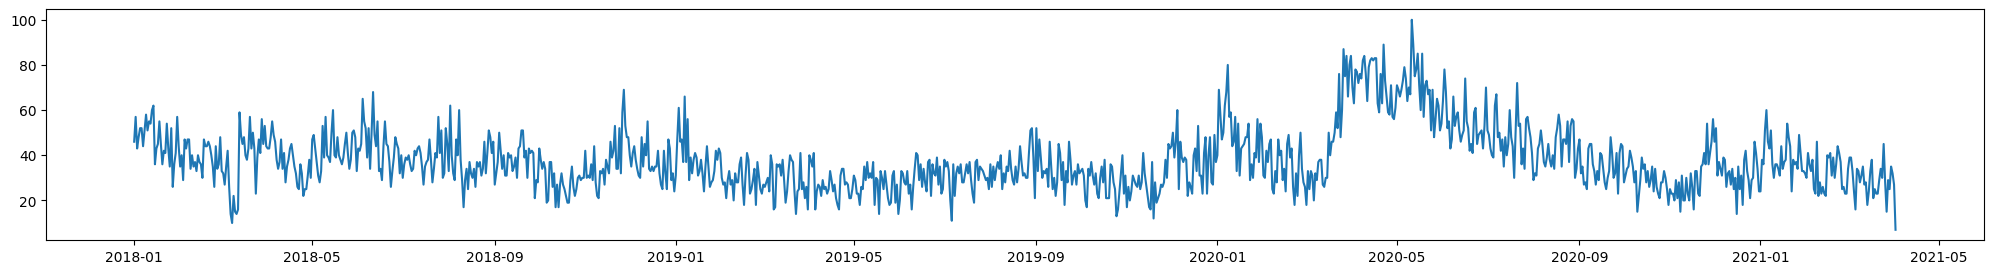

In [41]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

              Rating
Day                 
2018-01-01  4.532609
2018-01-02  4.122807
2018-01-03  4.360465
2018-01-04  4.531250
2018-01-05  4.423077
...              ...
2021-03-29  4.240000
2021-03-30  4.428571
2021-03-31  4.453125
2021-04-01  4.592593
2021-04-02  4.357143

[1188 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


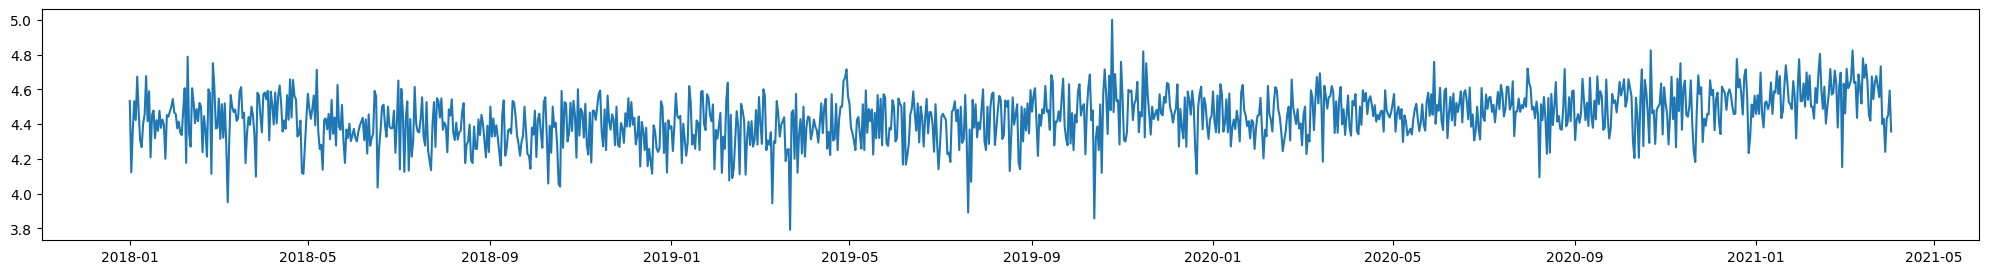

In [36]:
data['Day'] = data['Timestamp'].dt.date #dt gives you convenient access to operations on data stored as a pandas datetime
numeric_columns = data.select_dtypes(include='number').columns.tolist()
group_columns = ['Day'] + numeric_columns
day_average = data[group_columns].groupby(['Day']).mean() #groupby used to group large amounts of data and compute operations on these groups
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])
print(day_average)
print(type(day_average))

In [35]:
day_average['Rating'].min() #matplotlib chooses the minimum value for y-axis

np.float64(3.7916666666666665)

## Rating average by week

           Rating
Week             
2018-00  4.434564
2018-01  4.424933
2018-02  4.417702
2018-03  4.401024
2018-04  4.468085
...           ...
2021-09  4.560096
2021-10  4.627315
2021-11  4.629121
2021-12  4.607843
2021-13  4.429032

[173 rows x 1 columns]
Index(['2018-00', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09',
       ...
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2021-13'],
      dtype='object', name='Week', length=173)


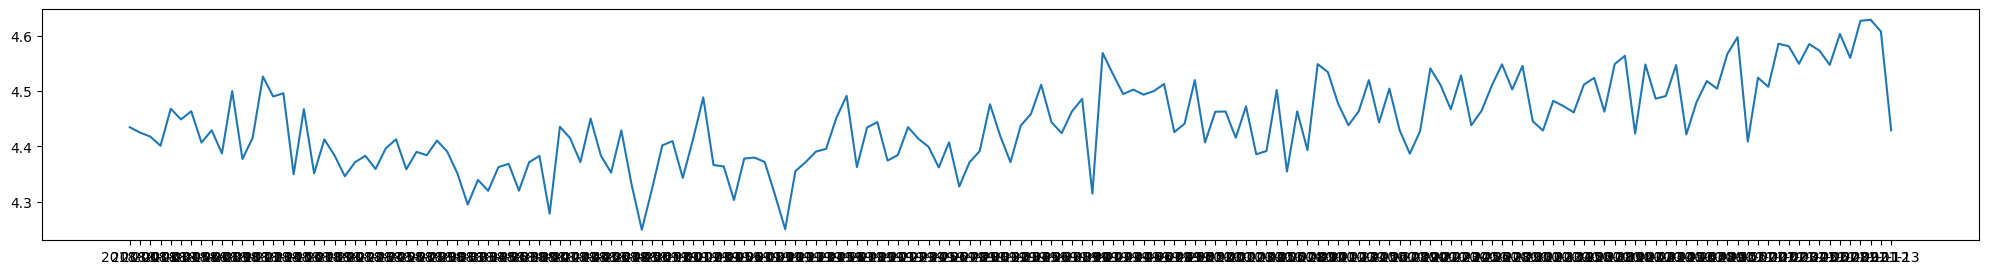

In [56]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U') #%Y is year - %U is week '-' is optional
numeric_columns = data.select_dtypes(include='number').columns.tolist()
group_columns = ['Week'] + numeric_columns
week_average = data[group_columns].groupby(['Week']).mean()
print(week_average)
print(week_average.index)
plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])

## Rating average by month

           Rating
Month            
2018-01  4.429645
2018-02  4.436248
2018-03  4.421671
2018-04  4.468211
2018-05  4.396420
2018-06  4.375379
2018-07  4.393184
2018-08  4.344753
2018-09  4.347247
2018-10  4.374429
2018-11  4.386817
2018-12  4.342105
2019-01  4.401920
2019-02  4.346964
2019-03  4.333145
2019-04  4.420049
2019-05  4.405569
2019-06  4.398559
2019-07  4.382353
2019-08  4.417059
2019-09  4.451135
2019-10  4.483871
2019-11  4.493260
2019-12  4.471046
2020-01  4.439615
2020-02  4.428642
2020-03  4.480690
2020-04  4.475220
2020-05  4.448082
2020-06  4.482812
2020-07  4.517508
2020-08  4.470987
2020-09  4.485862
2020-10  4.515201
2020-11  4.479306
2020-12  4.528358
2021-01  4.551325
2021-02  4.567901
2021-03  4.589207
2021-04  4.544118
Index(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-0

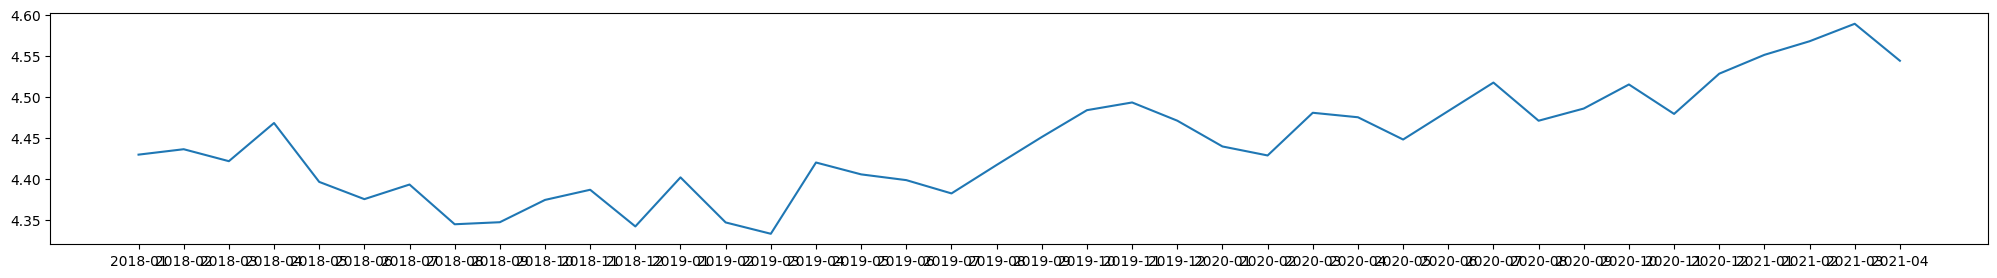

In [57]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m') #%Y is year - %U is week '-' is optional
numeric_columns = data.select_dtypes(include='number').columns.tolist()
group_columns = ['Month'] + numeric_columns
month_average = data[group_columns].groupby(['Month']).mean()
print(month_average)
print(month_average.index)
plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average['Rating'])

## Average rating by month by course

In [58]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04


Course Name  100 Python Exercises I: Evaluate and Improve Your Skills  \
Month                                                                   
2018-01                                                   58.0          
2018-02                                                   36.0          
2018-03                                                   46.0          
2018-04                                                   29.0          
2018-05                                                   46.0          
2018-06                                                   41.0          
2018-07                                                   28.0          
2018-08                                                   41.0          
2018-09                                                   44.0          
2018-10                                                   33.0          
2018-11                                                   47.0          
2018-12                                            

<Axes: xlabel='Month'>

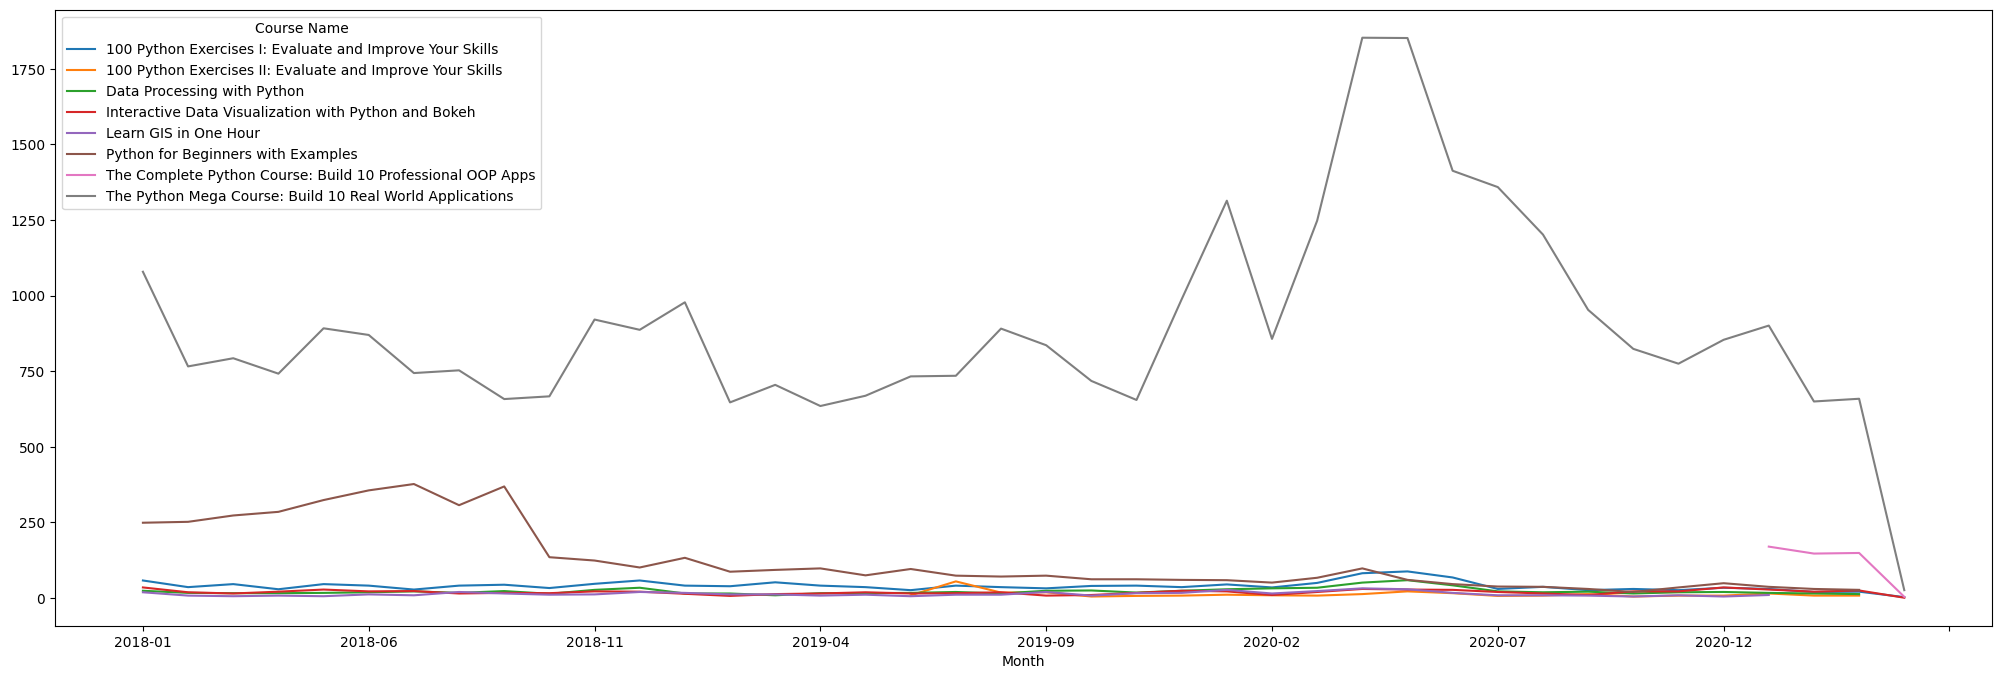

In [80]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m') #%Y is year - %U is week '-' is optional
numeric_columns = data.select_dtypes(include='number').columns.tolist()
group_columns = ['Month', 'Course Name'] + numeric_columns
month_average_crs = data[group_columns].groupby(['Month', 'Course Name'])['Rating'].count().unstack()
print(month_average_crs[:20])
month_average_crs.plot(figsize=(25, 8))

In [79]:
month_average_crs

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                                   58.0         
2018-02                                                   36.0         
2018-03                                                   46.0         
2018-04                                                   29.0         
2018-05                                                   46.0         
2018-06                                                   41.0         
2018-07                                                   28.0         
2018-08                                                   41.0         
2018-09                                                   44.0         
2018-10                                                   33.0         
2018-11                                                   47.0         
2018-12                                                   58.0         
2019-01                                                   41.0         
2019-02                                                   39.0         
2019-03                                                   52.0         
2019-04                                                   41.0         
2019-05                                                   36.0         
2019-06                                                   26.0         
2019-07                                                   41.0         
2019-08                                                   36.0         
2019-09                                                   32.0         
2019-10                                                   40.0         
2019-11                                                   41.0         
2019-12                                                   36.0         
2020-01                                                   45.0         
2020-02                                                   35.0         
2020-03                                                   50.0         
2020-04                                                   82.0         
2020-05                                                   88.0         
2020-06                                                   68.0         
2020-07                                                   30.0         
2020-08                                                   37.0         
2020-09                                                   26.0         
2020-10                                                   30.0         
2020-11                                                   26.0         
2020-12                                                   34.0         
2021-01                                                   30.0         
2021-02                                                   20.0         
2021-03                                                   21.0         
2021-04                                                    3.0         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

## What day are peope the happiest?

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Weekday')


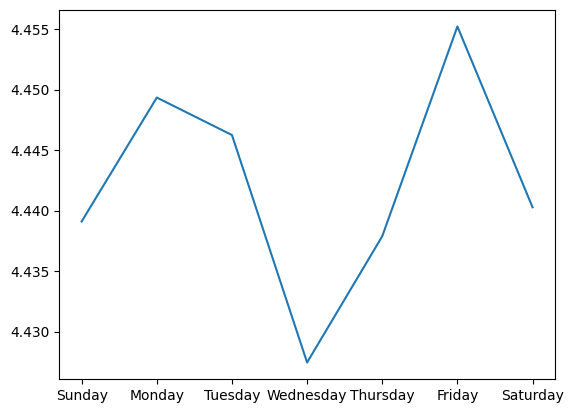

In [94]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
numeric_columns = data.select_dtypes(include='number').columns.tolist()
group_columns = ['Weekday', 'Daynumber'] + numeric_columns
weekday_average = data[group_columns].groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
print(weekday_average.index.get_level_values(0))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

In [96]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_pyplot_note',
 '_api',
 '_auto_draw_if_interactive',
 '_